# Work at holidays

The aim of this presentation is the demonstration of how we can investigate the scheme of the experimental device voltage consumption using python (in particular numpy and matplotlib). We can do this by solving any minor task.


For example, there is a problem such:

Let we have the device we investigate. We attached the oscilloscope to it and monitored the power voltage consumption like an analogue signal. But the signal we got was faulted because of the non-ideal tools we used. Before continuing our research we must solve this fault because we'll get a false answer otherwise.

So the task can be decomposed into 4 steps:
    1. Generate random signal that really is the combination of trigonometric functions.
    2. Add the noise to the signal to simulate problems in real life.
    3. Clean result signal using Fourier transform.
    4. Show the separate trigonometric functions for clarity.
    
    
Before we start, it's need to import some libraries and announce the constansts.

In [1]:
#!/usr/bin/env python3
# -*-encoding: utf-8-*-

import numpy as np
import module_for_plot as plt        # my module with simple functions
from numpy.fft import fft, ifft      # fast Fourier transform and an inverse one
import random
%matplotlib inline

A = 0               # start of the signal
B = 30              # end of the signal
N = 1000            # amount of points
ENOUGH = 100        # amount of first points that will show frequencies of signal decomposition without noise
                    # it was chosen by trial and error
    
funcs_amount = 3    # amount of the trigonometric functions 
noises_amount = 4   # amount of the trigonometric functions with high frequency (noise)

NpFunctions = [(np.sin, 'sin'), (np.cos, 'cos')]     # list for the random choice trigonometric function

## Generate random trigonometric function

Analogue signal is just some combination of trigonometric functions. So we just generate given amount of simple trigonometric functions like $$ a\sin(2\pi\phi x + \rho) $$ or $$ a\cos(2\pi\phi x + \rho)$$
where $$a, \phi, \rho$$ is amplitude, frequency and displacement respectively. 

In [2]:
def random_func():
    """ Create random trigonometric function (sin or cos)
    """
    tmp_func, tmp_func_name = NpFunctions[random.randint(0, 100) % 2]  # choose type of function
    _a = random.randint(0, 60) / 4      # amplitude
    phi = random.uniform(0, 1.5)        # frequency (will be multiplied by 2pi)
    r = random.randint(0, 10)           # displacement
    
    # result function with random parameters
    def res_func(x):       
        return _a * tmp_func(2 * np.pi * phi * x + r)
    
    # documentation is appearance of function
    res_func.__doc__ = '{:0.1f}{}(2pi * {:0.2f}x + {})'.format(_a, tmp_func_name, phi, r)

    return res_func

## Adding the noise
Then we add the noise that really is also combinations of trigonometric functions, but with high frequency. 

In [3]:
def random_noise():
    """ Create random trigonometric function with hight frequency (noise)
    """
    tmp_func, tmp_func_name = NpFunctions[random.randint(0, 100) % 2]  # choose type of function
    _a = random.uniform(0, 5)           # amolitude
    phi = random.uniform(5, 10)         # frequency (will be multiplied by 2pi)
    
    # result function with random parameters
    def res_func(x):
        return _a * tmp_func(2 * np.pi * x * phi)
    
    print('{:0.1f}{}(2pi * {:0.2f}x)'.format(_a, tmp_func_name, phi))
    return res_func

We just find the sum of generated simple functions.

In [4]:
functions = []                        # list of random functions 
label = 'f(x) = '                     # result function (sum of all)

for j in range(funcs_amount):
    tmp_function = random_func()      # generate given amount of random functions
    functions.append(tmp_function)
    label += tmp_function.__doc__ + ' + '

print('generated function: {}'.format(label.strip(' + ')))

print('\nnoises:')

functions += [random_noise() for j in range(noises_amount)]   # generate given amount of noises


generated function: f(x) = 1.5cos(2pi * 1.41x + 9) + 2.8sin(2pi * 0.29x + 2) + 14.2cos(2pi * 0.64x + 10)

noises:
2.7sin(2pi * 9.23x)
0.5cos(2pi * 5.79x)
2.9sin(2pi * 9.43x)
4.0cos(2pi * 6.45x)


## Cleaning

To be simple, Fourier transform is some manipulation with function that gives us information about frequencies of trigonometric components. So if we use the transform for our signal, we'll get the 'parameters' of function that we can change. Thus it's enough to replace information about high frequencies and use the inverse transform for clean our signal of noises (to be honest, I'm not sure that it is right, because I haven't understood enough the Fourier transform yet)

In [5]:
def cleaning(func: callable, a: float, b: float, n: int):
    """ Function that removes noise from signal using 
    discrete Fourier transform
    
    :param func: python vectorized function of single variable
    :param a: start of signal
    :param b: end of signal
    :param n: amount of points
    :return: numpy array of x-s and numpy array of result values of function
    """
    x = np.linspace(a, b, n)        # tabulating of function 
    y = func(x)

    ft_y = fft(y)                   # Fourier transform 
    plt.plot(x, y, 'input data')    # show input data and its transform
    plt.plot(x, abs(ft_y), "Fourier transform of data")
    
    # replace all the values after ENOUGH points with zeros (delete hight frequences)
    res = ifft(list(ft_y[:ENOUGH]) + list(np.zeros(n-ENOUGH)))  # and do inverse transform 
    return x, res

So let's clean our generated function!

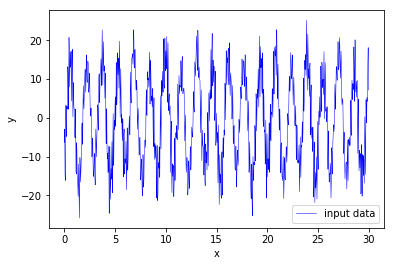

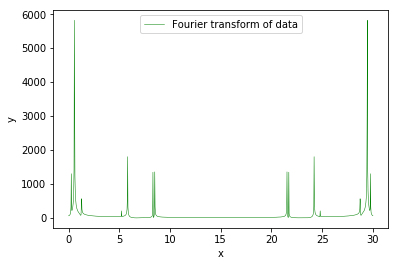

In [6]:
def test_func(x):          
    """ Result function with noise that is the sum of all the generated functions 

    :param x: float or numpy array
    """
    return sum(map(lambda f: f(x), functions))

test_x, good_y = cleaning(test_func, A, B, N)    # cleaning

In addition to plotting the cleaned version of the signal, we plot the signal without added noise to compare the graphs and check the correct work (I have no idea what that warning is).

/home/davidas/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


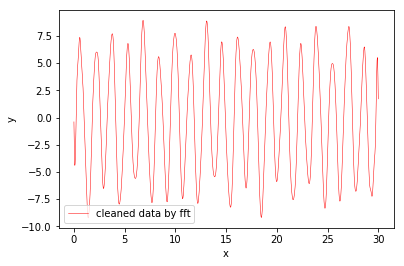

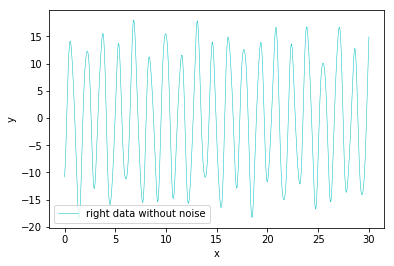

In [7]:
def test_func2(x):
    """ Result function without noise that is the sum of all the generated functions
    
    :param x: float or numpy array
    """
    return sum(map(lambda f: f(x), functions[:funcs_amount]))

plt.plot(test_x, good_y, 'cleaned data by fft')
plt.plot(test_x, test_func2(test_x), 'right data without noise')

## Plotting decomposition
And finally, let's plot the graphs of all the trigonometric pieces of input data

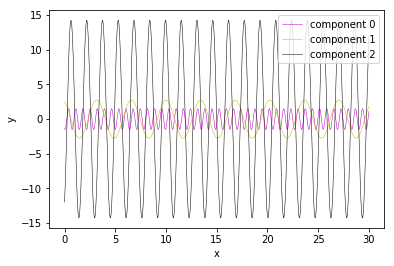

In [8]:
for j in range(funcs_amount-1):
    tmp_function = functions[j]
    plt.plot(test_x, tmp_function(test_x), f'component {j}', show=False)

plt.plot(test_x, functions[funcs_amount-1](test_x), f'component {funcs_amount-1}', show=True)